<a href="https://colab.research.google.com/github/0DianaHernandez/Simulacion-I/blob/main/Estimacion_Pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

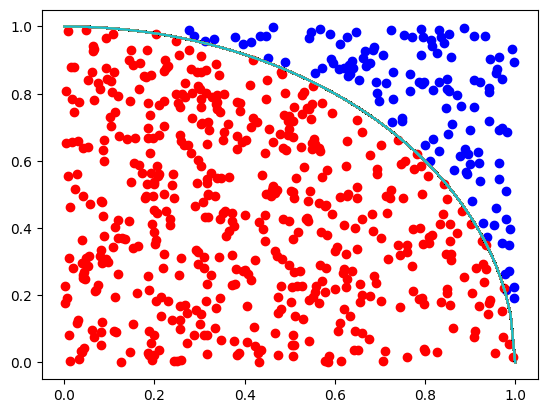

La estimación es: 3.2184615384615385


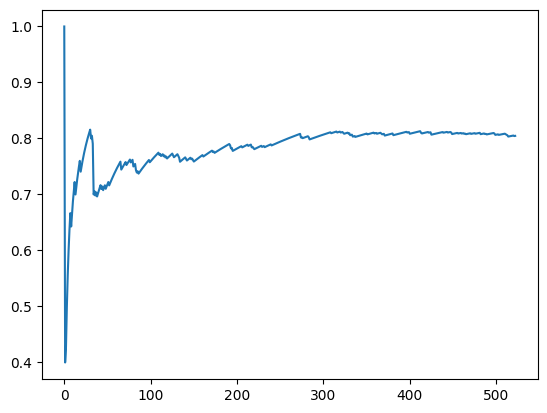

In [57]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm
N=650
exito=0
lista=[]
for i in range(N):
  x=np.linspace(0,1,100)
  u_1=random.uniform(0,1)
  u_2=random.uniform(0,1)
  plt.plot(x,np.sqrt(1-x**2))
  if u_2<np.sqrt(1-u_1**2):
    plt.scatter(u_1,u_2,color="red")
    exito+=1
    lista.append(exito/(i+1))
  else:
    plt.scatter(u_1,u_2,color="blue")


plt.show()
estimacion=4*(exito/N)
plt.plot(lista)
print("La estimación es:",estimacion)




